In [48]:
# import package
! pip install torchdiffeq
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch import optim
from torch.autograd import Variable
from scipy.integrate import solve_ivp
from torchvision import datasets, transforms
from torchdiffeq import odeint
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import math
from torch.autograd import grad

import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Epoch 0000: Loss = 92.134193, Boundary Loss = 0.004841, PDE Loss = 92.129349


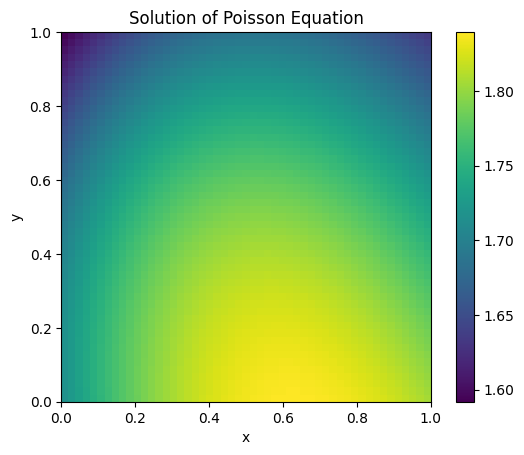

[92.13419342041016]
Epoch 0020: Loss = 5.652000, Boundary Loss = 0.076181, PDE Loss = 5.575819


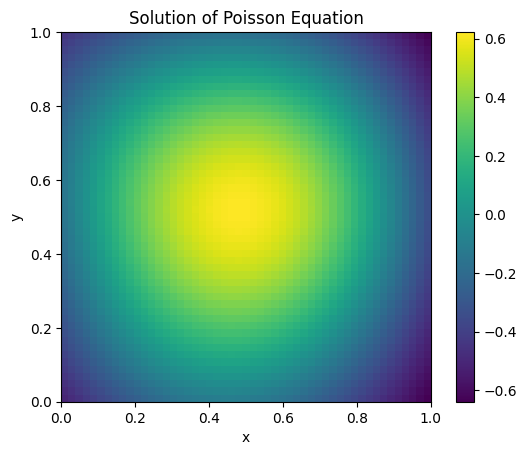

[92.13419342041016, 84.10328674316406, 50.37065887451172, 44.200172424316406, 36.25177001953125, 36.879905700683594, 22.863916397094727, 33.768245697021484, 23.30586051940918, 16.361345291137695, 17.81084632873535, 12.69882583618164, 7.543489933013916, 10.983864784240723, 7.226080894470215, 7.96185302734375, 5.026933670043945, 6.584472179412842, 4.203530311584473, 6.411503791809082, 5.6519999504089355]
Epoch 0040: Loss = 0.882216, Boundary Loss = 0.138642, PDE Loss = 0.743574


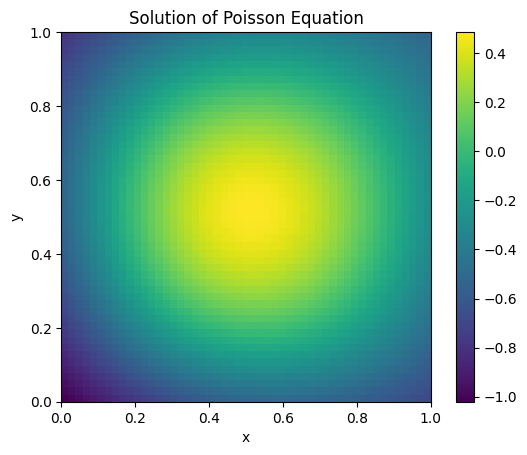

[92.13419342041016, 84.10328674316406, 50.37065887451172, 44.200172424316406, 36.25177001953125, 36.879905700683594, 22.863916397094727, 33.768245697021484, 23.30586051940918, 16.361345291137695, 17.81084632873535, 12.69882583618164, 7.543489933013916, 10.983864784240723, 7.226080894470215, 7.96185302734375, 5.026933670043945, 6.584472179412842, 4.203530311584473, 6.411503791809082, 5.6519999504089355, 3.6406362056732178, 2.2087242603302, 4.102441787719727, 2.614487409591675, 2.1677513122558594, 2.0933644771575928, 2.9896435737609863, 1.4958640336990356, 1.7269649505615234, 1.5696454048156738, 1.5139524936676025, 0.8327752947807312, 1.580845832824707, 1.4126259088516235, 0.9377722144126892, 1.3001993894577026, 0.8477847576141357, 0.9718369841575623, 0.7242206335067749, 0.8822159767150879]
Epoch 0060: Loss = 0.248883, Boundary Loss = 0.121605, PDE Loss = 0.127278


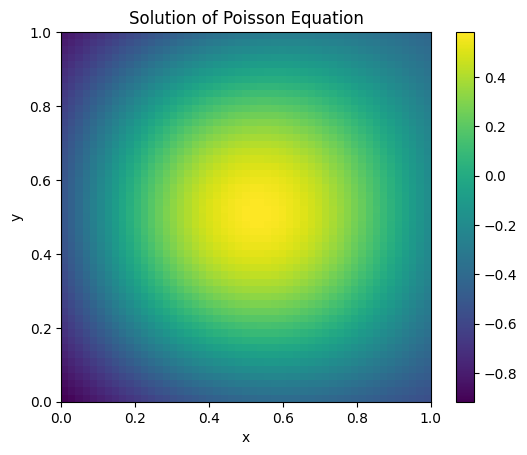

[92.13419342041016, 84.10328674316406, 50.37065887451172, 44.200172424316406, 36.25177001953125, 36.879905700683594, 22.863916397094727, 33.768245697021484, 23.30586051940918, 16.361345291137695, 17.81084632873535, 12.69882583618164, 7.543489933013916, 10.983864784240723, 7.226080894470215, 7.96185302734375, 5.026933670043945, 6.584472179412842, 4.203530311584473, 6.411503791809082, 5.6519999504089355, 3.6406362056732178, 2.2087242603302, 4.102441787719727, 2.614487409591675, 2.1677513122558594, 2.0933644771575928, 2.9896435737609863, 1.4958640336990356, 1.7269649505615234, 1.5696454048156738, 1.5139524936676025, 0.8327752947807312, 1.580845832824707, 1.4126259088516235, 0.9377722144126892, 1.3001993894577026, 0.8477847576141357, 0.9718369841575623, 0.7242206335067749, 0.8822159767150879, 0.8002667427062988, 0.6679279208183289, 0.5758059620857239, 0.7134206295013428, 0.5510795712471008, 0.4869464337825775, 0.47951239347457886, 0.5135801434516907, 0.4363987445831299, 0.4011443853378296,

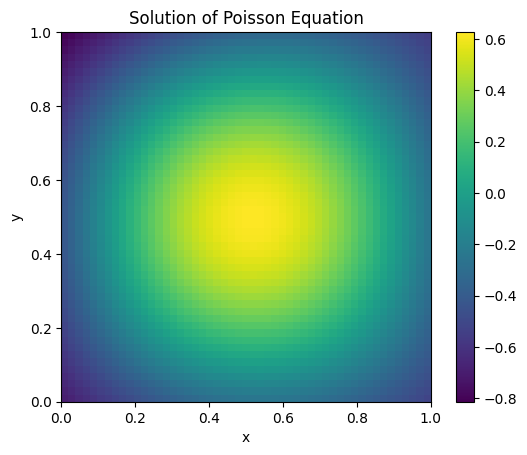

[92.13419342041016, 84.10328674316406, 50.37065887451172, 44.200172424316406, 36.25177001953125, 36.879905700683594, 22.863916397094727, 33.768245697021484, 23.30586051940918, 16.361345291137695, 17.81084632873535, 12.69882583618164, 7.543489933013916, 10.983864784240723, 7.226080894470215, 7.96185302734375, 5.026933670043945, 6.584472179412842, 4.203530311584473, 6.411503791809082, 5.6519999504089355, 3.6406362056732178, 2.2087242603302, 4.102441787719727, 2.614487409591675, 2.1677513122558594, 2.0933644771575928, 2.9896435737609863, 1.4958640336990356, 1.7269649505615234, 1.5696454048156738, 1.5139524936676025, 0.8327752947807312, 1.580845832824707, 1.4126259088516235, 0.9377722144126892, 1.3001993894577026, 0.8477847576141357, 0.9718369841575623, 0.7242206335067749, 0.8822159767150879, 0.8002667427062988, 0.6679279208183289, 0.5758059620857239, 0.7134206295013428, 0.5510795712471008, 0.4869464337825775, 0.47951239347457886, 0.5135801434516907, 0.4363987445831299, 0.4011443853378296,

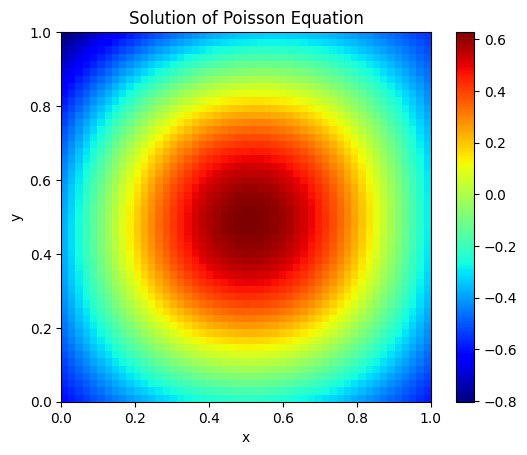

In [62]:
class ODEFunction(nn.Module):
    def __init__(self):
        super(ODEFunction, self).__init__()
        self.linear1 = nn.Linear(2, 2)
        self.linear2 = nn.Linear(2, 2)
        self.linear3 = nn.Linear(2, 2)
        self.fc = nn.Linear(64 * 28 * 28, 10)

    def forward(self, t, x):
        # print(x.size())
        # x = x.view(-1, 51, 51)
        x = torch.tanh(self.linear1(x))      
        x = torch.tanh(self.linear2(x))
        x = self.linear3(x)   
        # print(x.size())
        # x = x.view(2601, 2)
        # x = nn.functional.relu(self.linear3(x))      
        return x

class NeuralODE(nn.Module):
    def __init__(self):
        super(NeuralODE, self).__init__()
        self.ode = ODEFunction()
    def forward(self, x):
        t = torch.linspace(0., 1., 2)
        y = odeint(self.ode, x, t)[-1]
        return y
    
    def backward(self, grad_output):
        with torch.no_grad():
            t = self.integration_time[1]
            x = self.saved_tensors[0]
            z0 = self.saved_tensors[1]
            z1 = self.saved_tensors[2]
            v = grad_output

            for i in range(len(self.integration_time) - 1, 0, -1):
                ti = self.integration_time[i - 1]
                f = self.odefunc(ti, x)
                x = odeint(self.odefunc, x, torch.tensor([ti, t]))[0].detach()
                z0, z1 = z1, x
                v = torch.matmul(f.transpose(-2, -1), v)
                v = torch.autograd.grad(outputs=z1, inputs=(z0, t, v), grad_outputs=v,
                                        only_inputs=True, retain_graph=True)[0]
                t = ti

            f = self.odefunc(self.integration_time[0], x)
            v = torch.matmul(f.transpose(-2, -1), v)

        return v 

class PoissonNet(nn.Module):
    def __init__(self):
        super(PoissonNet, self).__init__()
        self.ode = NeuralODE()
        self.fc1 = nn.Linear(2, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 1)
        self.fc4 = nn.Linear(2, 1)

    def forward(self, x):
        # x = self.fc4(x)
        x = self.ode(x)
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x


def f(x):
    return -2 * (np.pi**2) * torch.sin(np.pi * x[:, 0]) * torch.sin(np.pi * x[:, 1])

def boundary_loss(model, x, y):
    y_pred = model(x)
    return torch.mean((y - y_pred)**2)

def pde_loss(model, x):
    x.requires_grad_(True)
    u = model(x)
    u_grad = grad(u, x, torch.ones_like(u), create_graph=True)[0]
    u_xx = grad(u_grad[:, 0], x, torch.ones_like(u_grad[:, 0]), create_graph=True)[0][:, 0]
    u_yy = grad(u_grad[:, 1], x, torch.ones_like(u_grad[:, 1]), create_graph=True)[0][:, 1]
    pde = u_xx + u_yy - f(x)
    return torch.mean(pde**2)


if __name__ == "__main__":
    # Define the domain
    x_min, x_max, y_min, y_max = 0, 1, 0, 1
    nx, ny = 51, 51
    x = np.linspace(x_min, x_max, nx)
    y = np.linspace(y_min, y_max, ny)
    xx, yy = np.meshgrid(x, y)
    X = np.concatenate([xx.reshape(-1, 1), yy.reshape(-1, 1)], axis=1)
    X = torch.tensor(X, dtype=torch.float32)

    # Define the model and optimizer
    model = PoissonNet()
    optimizer = optim.Adam(model.parameters(), lr=0.1)

    bloss_list = []
    pde_loss_list = []
    total_loss_list = []
    # Training loop
    for epoch in range(100):
        optimizer.zero_grad()

        # Compute loss
        boundary_loss_value = boundary_loss(model, X, torch.zeros(len(X)))
        pde_loss_value = pde_loss(model, X)
        loss = boundary_loss_value + pde_loss_value

        # Compute gradients and update weights
        loss.backward()
        optimizer.step()
        bloss_list.append(loss.item())
        pde_loss_list.append(boundary_loss_value.item())
        total_loss_list.append(pde_loss_value.item())

        # Print progress
        if epoch % 20 == 0:
            print("Epoch {:04d}: Loss = {:.6f}, Boundary Loss = {:.6f}, PDE Loss = {:.6f}".format(epoch, loss.item(), boundary_loss_value.item(), pde_loss_value.item()))
            u = model(X).detach().numpy().reshape(nx, ny)
            plt.imshow(u, extent=[x_min, x_max, y_min, y_max])
            plt.colorbar()
            plt.xlabel("x")
            plt.ylabel("y")
            plt.title("Solution of Poisson Equation")
            plt.savefig("/content/result/epoch" + str(epoch) + ".pdf")
            plt.show()
            print(bloss_list)
    # Plot results
    u = model(X).detach().numpy().reshape(nx, ny)
    plt.imshow(u, extent=[x_min, x_max, y_min, y_max], cmap="jet")
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Solution of Poisson Equation")
    plt.show()


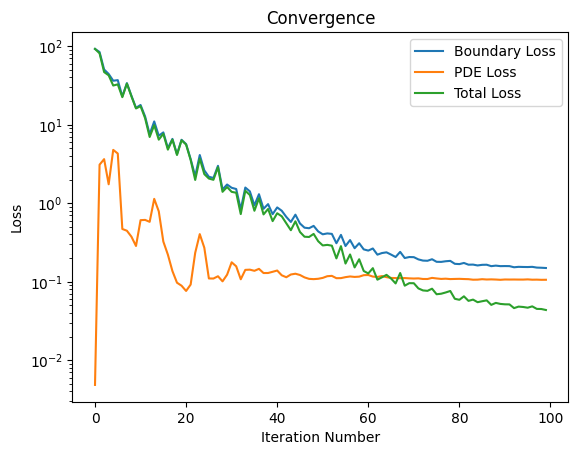

In [68]:
    # bloss_list.append(loss.item())
    #     pde_loss_list.append(boundary_loss_value.item())
    #     total_loss_list.append(pde_loss_value.item())

    plt.plot(range(len(bloss_list)), bloss_list, label='Boundary Loss')
    plt.plot(range(len(pde_loss_list)), pde_loss_list, label='PDE Loss')
    plt.plot(range(len(total_loss_list)), total_loss_list, label='Total Loss')

    plt.xlabel("Iteration Number")
    plt.ylabel("Loss")
    plt.yscale("log")
    plt.legend()
    plt.title("Convergence")
    plt.savefig("conve.pdf")
    plt.show()

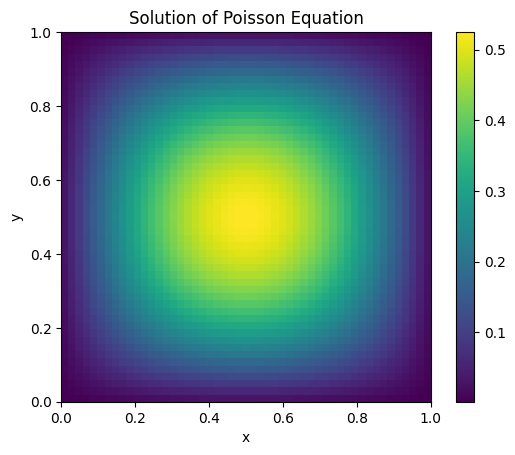

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define problem parameters
Lx = 1.0   # length of the domain in x direction
Ly = 1.0   # length of the domain in y direction
Nx = 51    # number of grid points in x direction
Ny = 51    # number of grid points in y direction
dx = Lx / (Nx-1)    # grid spacing in x direction
dy = Ly / (Ny-1)    # grid spacing in y direction
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)

# Define boundary conditions
u0 = np.zeros((Ny, Nx))
uN = np.sin(np.pi * y)
uE = np.zeros(Ny)
uW = np.zeros(Ny)

# Define source term
f = np.zeros((Ny, Nx))
for i in range(Nx):
    for j in range(Ny):
        f[j, i] = -np.pi**2 * np.sin(np.pi * x[i]) * np.sin(np.pi * y[j])

# Construct coefficient matrix A and right-hand side vector b
A = np.zeros((Nx*Ny, Nx*Ny))
b = np.zeros(Nx*Ny)
for i in range(Nx):
    for j in range(Ny):
        k = j * Nx + i
        b[k] = f[j, i]
        A[k, k] = -2.0 / dx**2 - 2.0 / dy**2
        if i > 0:
            A[k, k-1] = 1.0 / dx**2
        else:
            b[k] -= uW[j] / dx**2
        if i < Nx-1:
            A[k, k+1] = 1.0 / dx**2
        else:
            b[k] -= uE[j] / dx**2
        if j > 0:
            A[k, k-Nx] = 1.0 / dy**2
        else:
            b[k] -= u0[j, i] / dy**2
        if j < Ny-1:
            A[k, k+Nx] = 1.0 / dy**2
        else:
            b[k] -= uN[j] / dy**2

# Solve the system of equations
u = np.linalg.solve(A, b).reshape((Ny, Nx))

# Plot the solution
plt.imshow(u, extent=[x_min, x_max, y_min, y_max])
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solution of Poisson Equation")
plt.savefig("refPoisson.pdf")
plt.show()
